This notebook is used to manaully create the vasp jobs for vacancy and neb calculations somewhat. This needs to be integreated into the forge workflow. 

# load in the libraries

In [19]:
from ase.io import read,write
from ase.build import bulk 
from ase.optimize.precon import PreconLBFGS
from ase.filters import FrechetCellFilter

In [20]:
def relaxer(atoms, calc, relax_cell = True, fmax=0.01, steps=100):
    new_atoms = atoms.copy()
    new_atoms.calc = calc

    if relax_cell:
        fcf = FrechetCellFilter(new_atoms)
        relaxer = PreconLBFGS(fcf, use_armijo=True)
    else:
        relaxer = PreconLBFGS(new_atoms, use_armijo=True)
    
    relaxer.run(fmax=fmax, steps=steps)
    
    return new_atoms

# Load in the perfect structures

In [10]:
v = bulk('V', 'bcc', a=3.01) * (5,5,5)
print(v)
write('v.xyz', v)

Atoms(symbols='V125', pbc=True, cell=[[-7.5249999999999995, 7.5249999999999995, 7.5249999999999995], [7.5249999999999995, -7.5249999999999995, 7.5249999999999995], [7.5249999999999995, 7.5249999999999995, -7.5249999999999995]])


In [14]:
# get all the structures with final in it
from glob import glob
cif_files = glob('../alex-mrs-ce/data/CE_Structures_11-26_NEB_Structures/*final.cif')
print(cif_files)

['../alex-mrs-ce/data/CE_Structures_11-26_NEB_Structures/V0_920-Cr0_030-Ti0_030-W0_010-Zr0_010_final.cif', '../alex-mrs-ce/data/CE_Structures_11-26_NEB_Structures/V0_790-Cr0_050-Ti0_050-W0_050-Zr0_050_final.cif', '../alex-mrs-ce/data/CE_Structures_11-26_NEB_Structures/V0_920-Cr0_020-Ti0_020-W0_020-Zr0_020_final.cif', '../alex-mrs-ce/data/CE_Structures_11-26_NEB_Structures/V0_800-Cr0_075-Ti0_075-W0_025-Zr0_025_final.cif', '../alex-mrs-ce/data/CE_Structures_11-26_NEB_Structures/V0_920-Cr0_040-Ti0_040_final.cif', '../alex-mrs-ce/data/CE_Structures_11-26_NEB_Structures/V0_800-Cr0_025-Ti0_025-W0_075-Zr0_075_final.cif', '../alex-mrs-ce/data/CE_Structures_11-26_NEB_Structures/V0_920-Cr0_010-Ti0_010-W0_030-Zr0_030_final.cif']


In [15]:
#read each cif file in cif_files into the list 
structures = [read(cif) for cif in cif_files]
print(structures)

[Atoms(symbols='Cr4Ti4V115WZr', pbc=True, cell=[[13.03368233, 0.0, 0.0], [-4.344560775703545, 12.288273546172888, 0.0], [-4.344560775703545, -6.144136771043355, 10.64195706081759]], spacegroup_kinds=...), Atoms(symbols='Cr6Ti6V99W6Zr8', pbc=True, cell=[[13.03368233, 0.0, 0.0], [-4.344560775703545, 12.288273546172888, 0.0], [-4.344560775703545, -6.144136771043355, 10.64195706081759]], spacegroup_kinds=...), Atoms(symbols='Cr2Ti2V115W2Zr4', pbc=True, cell=[[13.03368233, 0.0, 0.0], [-4.344560775703545, 12.288273546172888, 0.0], [-4.344560775703545, -6.144136771043355, 10.64195706081759]], spacegroup_kinds=...), Atoms(symbols='Cr9Ti9V100W3Zr4', pbc=True, cell=[[13.03368233, 0.0, 0.0], [-4.344560775703545, 12.288273546172888, 0.0], [-4.344560775703545, -6.144136771043355, 10.64195706081759]], spacegroup_kinds=...), Atoms(symbols='Cr5Ti5V115', pbc=True, cell=[[13.03368233, 0.0, 0.0], [-4.344560775703545, 12.288273546172888, 0.0], [-4.344560775703545, -6.144136771043355, 10.64195706081759]], 

# Relax the perfect structure and make a vasp job for it

In [36]:
from mace.calculators.mace import MACECalculator
import numpy as np
model_paths = ['./models/gen_4_model_0-11-14_b4_stagetwo_compiled.model']
calc = MACECalculator(model_paths=model_paths, device='cpu', default_dtype='float32')

relaxed_structures = []
for i, cif in enumerate(structures):
    # perturb the structure very slightly to break symmetry at random
    cif.positions += np.random.normal(0.01, 0.1, cif.positions.shape)
    relaxed = relaxer(cif, calc, relax_cell=True, fmax=0.01, steps=100)
    #relaxed_file = f'relaxed_{i}.cif'
    #write(relaxed_file, relaxed)
    relaxed_structures.append(relaxed)
#relaxed_v = relaxer(v, calc, relax_cell=True, fmax=0.01, steps=100)

/opt/homebrew/Caskroom/miniforge/base/envs/allegro/lib/python3.10/site-packages/torch/serialization.py:779: UserWarning: 'torch.load' received a zip file that looks like a TorchScript archive dispatching to 'torch.jit.load' (call 'torch.jit.load' directly to silence this warning)
  warnings.warn("'torch.load' received a zip file that looks like a TorchScript archive"


PreconLBFGS:   0  15:23:21    -1106.557129       4.2415       0.0090
PreconLBFGS:   1  15:23:22    -1109.991211       3.5853       0.0025
PreconLBFGS:   2  15:23:23    -1112.380371       3.2743       0.0012
PreconLBFGS:   3  15:23:23    -1113.509521       3.1108       0.0021
PreconLBFGS:   4  15:23:23    -1114.331299       2.9885       0.0024
PreconLBFGS:   5  15:23:23    -1115.018677       2.8812       0.0026
PreconLBFGS:   6  15:23:24    -1115.632935       2.7800       0.0026
PreconLBFGS:   7  15:23:24    -1116.201904       2.6807       0.0025
PreconLBFGS:   8  15:23:24    -1116.739990       2.5807       0.0024
PreconLBFGS:   9  15:23:25    -1117.255371       2.4787       0.0023
PreconLBFGS:  10  15:23:25    -1117.753052       2.3737       0.0022
PreconLBFGS:  11  15:23:25    -1118.235840       2.2651       0.0020
PreconLBFGS:  12  15:23:26    -1118.705444       2.1528       0.0018
PreconLBFGS:  13  15:23:26    -1119.159058       2.0374       0.0016
PreconLBFGS:  14  15:23:26    -111

In [37]:
pre_data_path = './data/pre_vasp'
for i, relaxed in enumerate(relaxed_structures):
    composition = str(relaxed.get_chemical_formula()).replace(' ','')
    relaxed_file = f'{pre_data_path}/{composition}.xyz'
    write(relaxed_file, relaxed)

In [13]:
import os 
pre_data_path = './data/pre_vasp'
os.makedirs(pre_data_path, exist_ok=True)
# save the relaxed structure to an xyz file 
write(os.path.join(pre_data_path,'relaxed_v.xyz'), relaxed_v)

# Create Vacancies 

In [21]:
from ase.io import read
#relaxed_v_vasp = read('./data/post_vasp/Perf/v/OUTCAR')
#relaxed_vasp = read('./data/post_vasp/Perf/Cr4Ti4V115WZr/OUTCAR_Only/OUTCAR')
#relaxed_vasp = read('./data/post_vasp/Perf/Cr5Ti5V115/OUTCAR_Only/OUTCAR-1')
#relaxed_vasp = read('./data/post_vasp/Perf/Cr6Ti6V99W6Zr8/OUTCAR_Only/OUTCAR')
#relaxed_vasp = read('./data/post_vasp/MRS/Perf/Cr2Ti2V120W2Zr2/OUTCAR')
#relaxed_vasp = read('./data/post_vasp/MRS/Perf/Cr5Ti9V107W4Zr3/OUTCAR')
#relaxed_vasp = read('./data/post_vasp/MRS/Perf/Cr4Ti7V111W4Zr2/OUTCAR')
#relaxed_vasp = read('./data/post_vasp/MRS/Perf/Cr6Ti11V102W6Zr3/OUTCAR')
#relaxed_vasp = read('./data/post_vasp/MRS/Perf/Cr3Ti5V115W3Zr2/OUTCAR')
#relaxed_vasp = read('../data/vasp_jobs-neb-test/perf_t3/Cr2Ti11V108W3Zr_rank_1/OUTCAR')
#relaxed_vasp = read('../data/vasp_jobs-neb-test/perf_t3/Cr4Ti12V107WZr_rank_2/OUTCAR')
relaxed_vasp = read('../data/vasp_jobs-neb-test/perf_t3/Cr6Ti5V107W5Zr2_rank_0/OUTCAR')

In [22]:
# select atom at random 
import random
#random.seed(42) # seed for V
#random.seed(0) # seed for Cr4Ti4V115WZr
#random.seed(1) # seed for Cr5Ti5V115
#random.seed(2) # seed for Cr6Ti6V99W6Zr8

# for MRS
#random.seed(0) # seed for Cr2Ti2V120W2Zr2
#random.seed(1) # seed for Cr5Ti9V107W4Zr3
#random.seed(2) # seed for Cr4Ti7V111W4Zr2
#random.seed(3) # seed for Cr6Ti11V102W6Zr3
#random.seed(4) # seed for Cr3Ti5V115W3Zr2
#random.seed(5) # seed for Cr2Ti11V108W3Zr
#random.seed(6) # seed for Cr4Ti12V107WZr
random.seed(7) # seed for Cr6Ti5V107W5Zr2

# get the number of atoms in the relaxed_v_vasp structure
n_atoms = len(relaxed_vasp)

# select a random atom index
random_atom_index = random.randint(0, n_atoms-1)
print(f'Random atom index: {random_atom_index}')

Random atom index: 41


## working neigbor finder

In [23]:
from ase.build import bulk
import numpy as np
from ase.neighborlist import NeighborList
import numpy as np
from ase.neighborlist import NeighborList

def get_neighbors_cutoff(atoms, index, nn_cutoff=2.8, nnn_cutoff=3.2):
    """
    Get nearest and next-nearest neighbors using distance cutoffs.
    
    Parameters:
    -----------
    atoms : ase.Atoms
        The atomic structure
    index : int
        Index of the atom to find neighbors for
    nn_cutoff : float
        Cutoff radius for nearest neighbors (default: 2.8 Å for V)
    nnn_cutoff : float
        Cutoff radius for next-nearest neighbors (default: 3.2 Å for V)
    
    Returns:
    --------
    dict
        Dictionary containing nearest and next-nearest neighbor information
    """
    # Create a neighbor list with the larger cutoff
    cutoff = nnn_cutoff
    nl = NeighborList([cutoff/2] * len(atoms), skin=0.0, self_interaction=False, bothways=True)
    nl.update(atoms)
    
    # Get all neighbors and distances
    indices, offsets = nl.get_neighbors(index)
    positions = atoms.positions
    cell = atoms.get_cell()
    distances = []
    
    for i, offset in zip(indices, offsets):
        pos_i = positions[i] + np.dot(offset, cell)
        dist = np.linalg.norm(pos_i - positions[index])
        distances.append(dist)
    
    distances = np.array(distances)
    
    # Separate into NN and NNN based on distances
    nn_mask = distances <= nn_cutoff
    nnn_mask = (distances > nn_cutoff) & (distances <= nnn_cutoff)
    
    # Sort both sets by distance
    nn_indices = indices[nn_mask]
    nn_distances = distances[nn_mask]
    nn_sort = np.argsort(nn_distances)
    
    nnn_indices = indices[nnn_mask]
    nnn_distances = distances[nnn_mask]
    nnn_sort = np.argsort(nnn_distances)
    
    return {
        'nn_indices': nn_indices[nn_sort],
        'nn_distances': nn_distances[nn_sort],
        'nnn_indices': nnn_indices[nnn_sort],
        'nnn_distances': nnn_distances[nnn_sort]
    }

from ase.build import bulk

# Create 5x5x5 BCC Vanadium supercell
v = bulk('V', 'bcc', a=3.01, cubic=True)*(4,4,4)

# Get neighbors for atom index 0
results = get_neighbors_cutoff(relaxed_vasp, random_atom_index)

print("Nearest neighbors:")
print(f"Found {len(results['nn_indices'])} neighbors")
for idx, dist in zip(results['nn_indices'], results['nn_distances']):
    print(f"Atom {idx}: {dist:.3f} Å")

print("\nNext-nearest neighbors:")
print(f"Found {len(results['nnn_indices'])} neighbors")
for idx, dist in zip(results['nnn_indices'], results['nnn_distances']):
    print(f"Atom {idx}: {dist:.3f} Å")

Nearest neighbors:
Found 8 neighbors
Atom 12: 2.536 Å
Atom 36: 2.597 Å
Atom 17: 2.624 Å
Atom 62: 2.624 Å
Atom 42: 2.626 Å
Atom 40: 2.633 Å
Atom 8: 2.700 Å
Atom 46: 2.702 Å

Next-nearest neighbors:
Found 6 neighbors
Atom 13: 2.954 Å
Atom 35: 2.976 Å
Atom 6: 3.009 Å
Atom 118: 3.057 Å
Atom 119: 3.106 Å
Atom 63: 3.121 Å


In [24]:
print(results)

{'nn_indices': array([12, 36, 17, 62, 42, 40,  8, 46]), 'nn_distances': array([2.53569705, 2.59740429, 2.62365515, 2.62404167, 2.62563417,
       2.63256615, 2.70001413, 2.70154064]), 'nnn_indices': array([ 13,  35,   6, 118, 119,  63]), 'nnn_distances': array([2.95412184, 2.97636875, 3.00893369, 3.05743114, 3.10592807,
       3.12120226])}


In [25]:
# pick one of the nearest neighbors at random
random_nn_index = random.choice(results['nn_indices'])
print(f'Random nearest neighbor index: {random_nn_index}')

Random nearest neighbor index: 17


In [26]:
# create two copies of start and end structures
start = relaxed_vasp.copy()
end = relaxed_vasp.copy()

# get the positions of the random atom and its nearest neighbor
start_pos = start.positions[random_atom_index]
end_pos = end.positions[random_nn_index]
print(f"Position of random atom in start structure: {start_pos}")
print(f"Position of random nearest neighbor in end structure: {end_pos}")

# remove the random atom for both start and end structures 
start.pop(random_atom_index)
end.pop(random_atom_index)
print(f"Removed random atom from start and end structures")
start_indices = [atom.index for atom in start]
end_indices = [atom.index for atom in end]
print(f"Indices of atoms in start structure: {start_indices}")
print(f"Indices of atoms in end structure: {end_indices}")
# move the random_nn_index atom to the position of the random atom in the end structure
end.positions[random_nn_index] = start_pos
print(f"Position of random nearest neighbor in end structure after moving: {end.positions[random_nn_index]}")

Position of random atom in start structure: [ 2.97043  2.97612 -0.05892]
Position of random nearest neighbor in end structure: [ 4.50367  1.4844  -1.57797]
Removed random atom from start and end structures
Indices of atoms in start structure: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123]
Indices of atoms in end structure: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 

In [10]:
from mace.calculators.mace import MACECalculator
import numpy as np
model_paths = ['./models/gen_5_model_0-11-28_stagetwo.model']
calc = MACECalculator(model_paths=model_paths, device='cpu', default_dtype='float32')
#relax the start and end structures
relaxed_start = relaxer(start, calc, relax_cell=False, fmax=0.01, steps=100)
relaxed_end = relaxer(end, calc, relax_cell=False, fmax=0.01, steps=100)

/opt/homebrew/Caskroom/miniforge/base/envs/mace/lib/python3.11/site-packages/e3nn/o3/_wigner.py:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  _Jd, _W3j_flat, _W3j_indice

PreconLBFGS:   0  11:48:04    -1107.936768       0.4631
PreconLBFGS:   1  11:48:05    -1108.058472       0.3717
PreconLBFGS:   2  11:48:05    -1108.183716       0.3455
PreconLBFGS:   3  11:48:05    -1108.266846       0.2847
PreconLBFGS:   4  11:48:05    -1108.318115       0.1942
PreconLBFGS:   5  11:48:06    -1108.346924       0.1136
PreconLBFGS:   6  11:48:06    -1108.358276       0.0817
PreconLBFGS:   7  11:48:06    -1108.367188       0.0293
PreconLBFGS:   8  11:48:06    -1108.367920       0.0236
PreconLBFGS:   9  11:48:06    -1108.368652       0.0151
PreconLBFGS:  10  11:48:06    -1108.368896       0.0114
PreconLBFGS:  11  11:48:07    -1108.369141       0.0078
PreconLBFGS:   0  11:48:07    -1107.980103       0.3700
PreconLBFGS:   1  11:48:08    -1108.075562       0.3032
PreconLBFGS:   2  11:48:08    -1108.227661       0.2417
PreconLBFGS:   3  11:48:08    -1108.264404       0.1611
PreconLBFGS:   4  11:48:08    -1108.303955       0.0892
PreconLBFGS:   5  11:48:08    -1108.315308      

In [27]:
import os
from ase.io import read,write
# write the start and end structures to xyz files 
#output_path = './data/pre_vasp/MRS/Vac/Cr3Ti5V115W3Zr2'
#output_path = '../data/vasp_jobs-neb-test/vac_t3/Cr2Ti11V108W3Zr_rank_1'
#output_path = '../data/vasp_jobs-neb-test/vac_t3/Cr4Ti12V107WZr_rank_2'
output_path = '../data/vasp_jobs-neb-test/vac_t3/Cr6Ti5V107W5Zr2_rank_0'

if not os.path.exists(output_path):
    os.makedirs(output_path)
    
write(os.path.join(output_path, f'rel_start_{random_atom_index}.xyz'), start)
write(os.path.join(output_path, f'rel_end_{random_nn_index}.xyz'), end)


### Create Vacancy Jobs in VASP 

In [28]:
start_poscar = read(os.path.join(output_path, f'rel_start_{random_atom_index}.xyz'))
end_poscar = read(os.path.join(output_path, f'rel_end_{random_nn_index}.xyz'))
write(os.path.join(output_path, f'POSCAR_0'), start_poscar, format='vasp')
write(os.path.join(output_path, f'POSCAR_1'), end_poscar, format='vasp')




# Create NEB Barriers

In [1]:
from ase.io import read,write
from ase.mep import DyNEB

#start_path = './data/post_vasp/Vac/Cr5Ti5V115/Rel_Start_17/OUTCAR'
#end_path ='./data/post_vasp/Vac/Cr5Ti5V115/Rel_End_23/OUTCAR'
#start_path = './data/post_vasp/MRS/Vac/Cr2Ti2V120W2Zr2/Start_Index_98/OUTCAR'
#end_path = './data/post_vasp/MRS/Vac/Cr2Ti2V120W2Zr2/End_Index_117/OUTCAR'

#start_path = './data/post_vasp/MRS/Vac/Cr5Ti9V107W4Zr3/Start_Index_34/OUTCAR'
#end_path = './data/post_vasp/MRS/Vac/Cr5Ti9V107W4Zr3/End_Index_110/OUTCAR'

start_path = '../data/vasp_jobs-neb-test/vac_t3/Cr6Ti5V107W5Zr2_rank_0/Start_Index_41/OUTCAR'
end_path = '../data/vasp_jobs-neb-test/vac_t3/Cr6Ti5V107W5Zr2_rank_0/End_Index_17/OUTCAR'



start_relaxed =  read(start_path)
end_relaxed = read(end_path)

In [2]:
images = [start_relaxed]
images += [start_relaxed.copy() for i in range(5)]
images += [end_relaxed]

In [2]:
import os 
from ase.io import read
# run if you already did neb
#pre_neb_path = '/Users/myless/Packages/summit_analysis/data/post_vasp/NEB/Cr5Ti5V115'
pre_neb_path = './data/post_vasp/MRS/NEB/Cr2Ti2V120W2Zr2'
if not os.path.exists(pre_neb_path):
    os.makedirs(pre_neb_path)
images = [read(os.path.join(pre_neb_path,f'POSCAR_{i}.xyz')) for i in range(7)]

In [3]:
from ase.mep import DyNEB
neb = DyNEB(images, k=0.1, climb=True)
neb.interpolate(mic=True)

In [4]:
import os
# write the intepolated images to a poscar as POSCAR files 
#data_path = './data/pre_vasp/NEB/Cr5Ti5V115_preconv'
#data_path = './data/pre_vasp/MRS/NEB/Cr2Ti2V120W2Zr2'
#data_path = './data/pre_vasp/MRS/NEB/Cr5Ti9V107W4Zr3'
data_path = '../data/vasp_jobs-neb-test/neb_t3/Cr6Ti5V107W5Zr2_rank_0'

if not os.path.exists(data_path):
    os.makedirs(data_path)

for i, image in enumerate(neb.images):
    folder_path = os.path.join(data_path, f"0{i}")
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)
    write(os.path.join(folder_path,"POSCAR"), image)
    write(os.path.join(data_path, f"POSCAR_{i}.xyz"),image)

# copy the start_path and end_path to data_path,"00" and "06" respectively

import shutil
shutil.copy(start_path, os.path.join(data_path, "00","OUTCAR"))
shutil.copy(end_path, os.path.join(data_path, "06","OUTCAR"))


'../data/vasp_jobs-neb-test/neb_t3/Cr6Ti5V107W5Zr2_rank_0/06/OUTCAR'

In [4]:
# use the prediction model to predict the energy of the images
from mace.calculators.mace import MACECalculator
from ase.optimize import FIRE

model_paths = ['./models/gen_5_model_0-11-28_stagetwo.model']
#calc = MACECalculator(model_paths=model_paths, device='cpu', default_dtype='float32')
for image in neb.images:
    image.calc = MACECalculator(model_paths=model_paths, device='cpu', default_dtype='float32')
opt = FIRE(neb)


/opt/homebrew/Caskroom/miniforge/base/envs/mace/lib/python3.11/site-packages/e3nn/o3/_wigner.py:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  _Jd, _W3j_flat, _W3j_indice

In [5]:
opt.run(fmax=0.05, steps=200)

      Step     Time          Energy          fmax
FIRE:    0 19:52:49    -1139.160034        4.503356
FIRE:    1 19:52:51    -1139.813354        3.472774
FIRE:    2 19:52:52    -1140.580078        2.054349
FIRE:    3 19:52:53    -1141.006714        1.375409
FIRE:    4 19:52:54    -1141.208008        0.979461
FIRE:    5 19:52:55    -1141.276733        0.618901
FIRE:    6 19:52:56    -1141.282959        0.621027
FIRE:    7 19:52:57    -1141.276123        0.811151
FIRE:    8 19:52:59    -1141.281738        0.854456
FIRE:    9 19:53:00    -1141.292480        0.823256
FIRE:   10 19:53:01    -1141.312256        0.762601
FIRE:   11 19:53:02    -1141.338501        0.675781
FIRE:   12 19:53:03    -1141.367310        0.568673
FIRE:   13 19:53:04    -1141.395264        0.447275
FIRE:   14 19:53:05    -1141.418823        0.315870
FIRE:   15 19:53:07    -1141.435913        0.180804
FIRE:   16 19:53:08    -1141.446045        0.103128
FIRE:   17 19:53:10    -1141.448242        0.165731
FIRE:   18 19:

True

MACE Barrier energy: 1.4786376953125 eV
VASP Barrier energy: 3.6625406900000144 eV
Absolute Error: 2.1839029946875144 eV
Percent Error: -59.63%
MACE MAE: 0.0072495912093172524 eV/atom


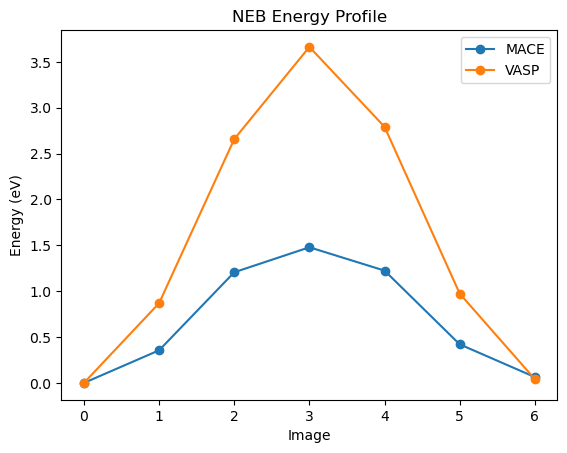

In [6]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
import numpy as np
energies = [image.get_potential_energy() for image in neb.images]
norm_energies = [energy - energies[0] for energy in energies]
print(f"MACE Barrier energy: {max(norm_energies)} eV")
plt.plot(norm_energies, marker='o')

outcar_data_path = './data/post_vasp/MRS/NEB/Cr2Ti2V120W2Zr2/Outcars'
vasp_energies = [read(os.path.join(outcar_data_path,f'OUTCAR_{i}')).get_potential_energy() for i in range(7)]
norm_vasp_energies = [energy - vasp_energies[0] for energy in vasp_energies]
print(f"VASP Barrier energy: {max(norm_vasp_energies)} eV")
plt.plot(norm_vasp_energies, marker='o')

predicted_value = norm_energies[0] - max(norm_energies)
actual_value = norm_vasp_energies[0] - max(norm_vasp_energies)
# Calculate absolute error
absolute_error = abs(predicted_value - actual_value)
print(f"Absolute Error: {absolute_error} eV")
# Calculate percent error
percent_error = (absolute_error / actual_value) * 100
print(f"Percent Error: {percent_error:.2f}%")
norm_energies = np.array(norm_energies)/124
norm_vasp_energies = np.array(norm_vasp_energies)/124
print(f"MACE MAE: {mean_absolute_error(norm_energies, norm_vasp_energies)} eV/atom")



plt.xlabel('Image')
plt.ylabel('Energy (eV)')
plt.title('NEB Energy Profile')
plt.legend(['MACE', 'VASP'])
plt.show()


In [ ]:
from pymatgen.io.vasp.outputs import Outcar
# read the energies from the OUTCAR files in data_path 
data_path = './data/post_vasp/NEB/Cr5Ti5V115'

vasp_energies = []
final_structures = []
for i in range(7):
    outcar_path = os.path.join(data_path, f"0{i}", "OUTCAR")
    outcar = Outcar(outcar_path)
    energy = outcar.final_energy_wo_entrp
    vasp_energies.append(energy)
    print(f"Energy of image {i}: {energy} eV")

Energy of image 0: -1104.50757769 eV
Energy of image 1: -1103.65651586 eV
Energy of image 2: -1101.0755175 eV
Energy of image 3: -1099.90437419 eV
Energy of image 4: -1101.10982998 eV
Energy of image 5: -1103.66225297 eV
Energy of image 6: -1104.49651059 eV


In [11]:
final_structures = []
ase_energies = []
for i in range(7):
    outcar_path = os.path.join(data_path, 'Outcars', f"OUTCAR_0{i}")
    atoms = read(outcar_path)
    final_structures.append(atoms)
    ase_energies.append(atoms.get_potential_energy())
    print(f"Energy of image {i}: {atoms.get_potential_energy()} eV")


Energy of image 0: -1104.51906741 eV
Energy of image 1: -1103.66708863 eV
Energy of image 2: -1101.08385891 eV
Energy of image 3: -1099.90698866 eV
Energy of image 4: -1101.12361742 eV
Energy of image 5: -1103.66372659 eV
Energy of image 6: -1104.49643406 eV


In [12]:
# write the atoms 
from ase.io import write
data_path = './data/pre_vasp/NEB_Engrad/Cr5Ti5V115'
if not os.path.exists(data_path):
    os.makedirs(data_path)

write(os.path.join(data_path, 'neb_images.xyz'), final_structures, format='extxyz')

Barrier energy: 4.603203500000063 eV


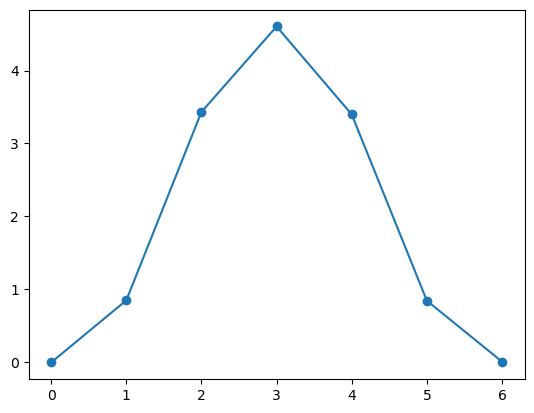

In [10]:
import matplotlib.pyplot as plt
norm_energies = [energy - vasp_energies[0] for energy in vasp_energies]
print(f"Barrier energy: {max(norm_energies)} eV")
plt.plot(norm_energies, marker='o')

In [26]:
for i, energy in enumerate(energies):
    print(f"Image {i}: {energy} eV")

Image 0: -1111.14794921875 eV
Image 1: -1110.1282958984375 eV
Image 2: -1107.7921142578125 eV
Image 3: -1106.5908203125 eV
Image 4: -1107.8787841796875 eV
Image 5: -1110.451416015625 eV
Image 6: -1111.4564208984375 eV


Barrier energy: 0.470703125 eV


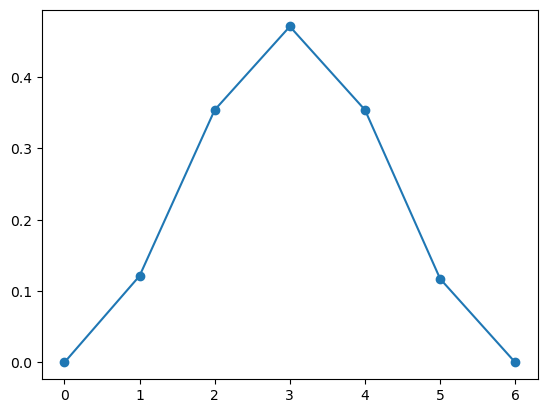

In [23]:
import matplotlib.pyplot as plt
climb_energies = [image.get_potential_energy() for image in neb.images]
climb_norm_energies = [energy - climb_energies[0] for energy in climb_energies]
print(f"Barrier energy: {max(climb_norm_energies)} eV")
plt.plot(climb_norm_energies, marker='o')

In [38]:
import os
# write the intepolated images to a poscar as POSCAR files 
data_path = './data/pre_vasp/NEB/Cr5Ti5V115_preconv'
if not os.path.exists(data_path):
    os.makedirs(data_path)

for i, image in enumerate(neb.images):
    folder_path = os.path.join(data_path, f"0{i}")
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)
    write(os.path.join(folder_path,"POSCAR"), image)
    write(os.path.join(data_path, f"POSCAR_{i}.xyz"),image)

# copy the start_path and end_path to data_path,"00" and "06" respectively

import shutil
shutil.copy(start_path, os.path.join(data_path, "00","OUTCAR"))
shutil.copy(end_path, os.path.join(data_path, "06","OUTCAR"))
shutil.copy(os.path.join(os.path.dirname(start_path), "KPOINTS"), os.path.join(data_path,"KPOINTS"))
shutil.copy(os.path.join(os.path.dirname(start_path), "POTCAR"), os.path.join(data_path,"POTCAR"))
shutil.copy(os.path.join(os.path.dirname(start_path), "INCAR"), os.path.join(data_path,"INCAR"))


'./data/pre_vasp/NEB/Cr5Ti5V115_preconv/INCAR'